# <span style="color:skyblue">Data Preperation</span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("C:\\Dell\\prodigy_task_2\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
print(df.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0 and df[col].dtype == 'O':  
        df[col].fillna(df[col].mode().iloc[0], inplace=True)  
    elif df[col].isnull().sum() > 0 and df[col].dtype != 'O':  
        df[col].fillna(df[col].mean(), inplace=True)  

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# <span style="color:skyblue">Exploratory Data Analysis 🎨</span> 

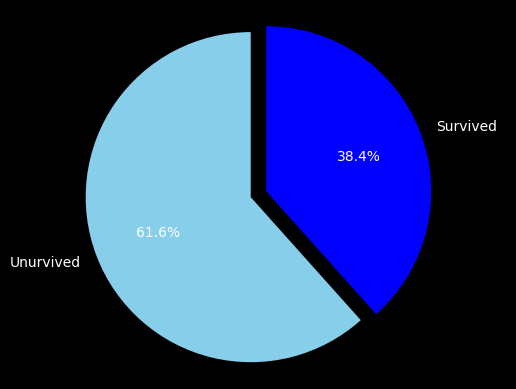

In [10]:
plt.pie(df['Survived'].value_counts(),labels=['Unurvived', 'Survived'],
         autopct='%1.1f%%', startangle=90,
         colors=['skyblue', 'blue'],
         explode = (0.1, 0))

plt.axis('equal') 
plt.style.use('dark_background') 
plt.show()

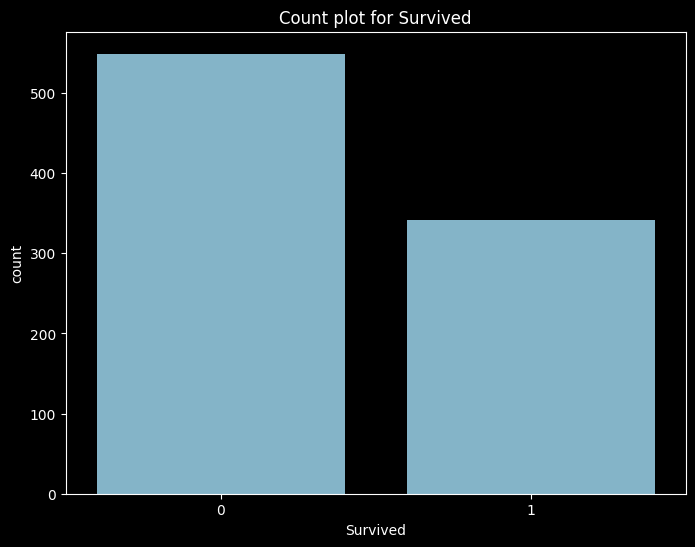

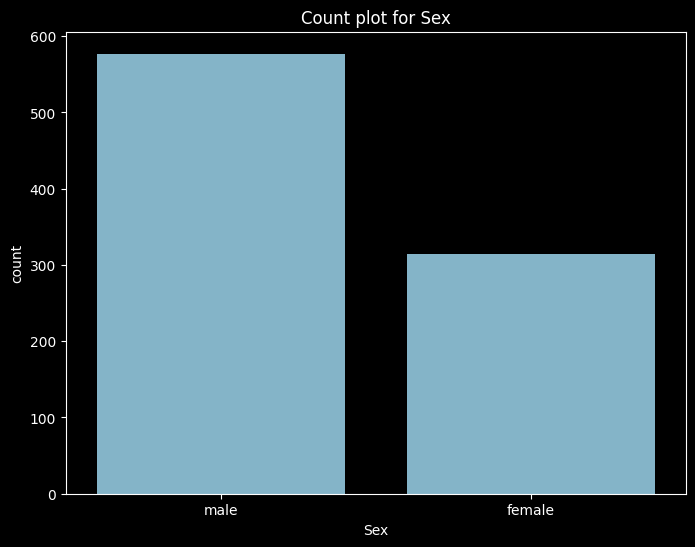

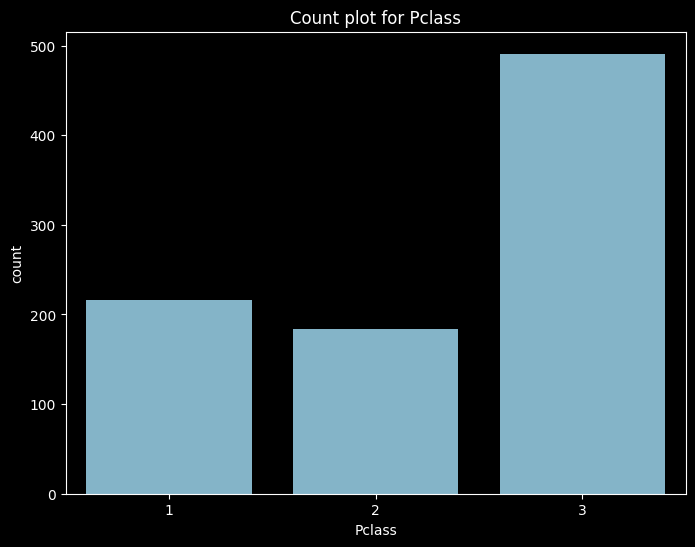

In [11]:
for col in ['Survived','Sex','Pclass']:
        df[col].value_counts()
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df,color='skyblue',alpha=.9)
        plt.title(f'Count plot for {col}')
        plt.style.use('dark_background')
        plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_9176\4217892744.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='Survived', data=df,color='skyblue',alpha=.9)


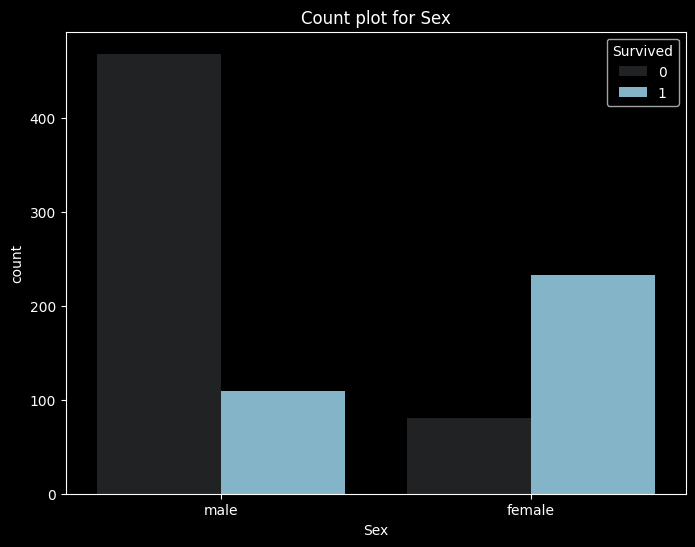

C:\Users\dell\AppData\Local\Temp\ipykernel_9176\4217892744.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=col, hue='Survived', data=df,color='skyblue',alpha=.9)


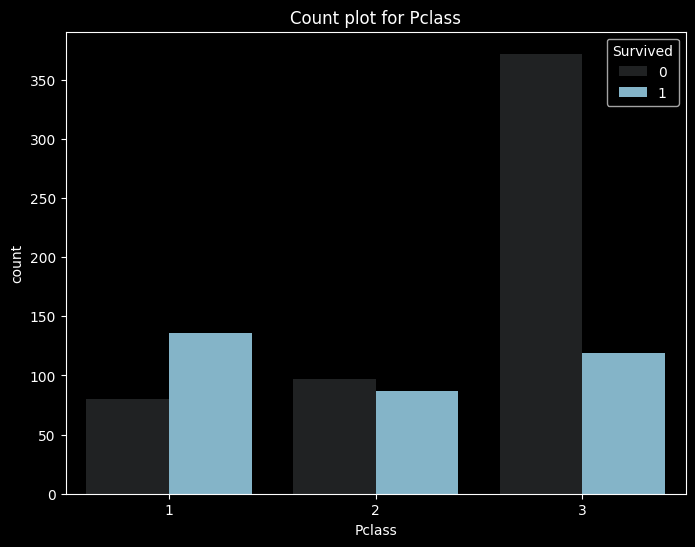

In [12]:
for col in ['Sex','Pclass']:
        df[col].value_counts()
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, hue='Survived', data=df,color='skyblue',alpha=.9)
        plt.title(f'Count plot for {col}')
        plt.style.use('dark_background')
        plt.show()

# <span style="color:skyblue"> Encoding & Scaling </span>

In [13]:

for col in ['Sex','Embarked']:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

for col in ['Age','Fare']:     
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
        
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.592481,1,0,A/5 21171,-0.502445,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.638789,1,0,PC 17599,0.786845,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.284663,0,0,STON/O2. 3101282,-0.488854,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.407926,1,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.407926,0,0,373450,-0.486337,B96 B98,2


In [14]:
for col in df.columns:
    if df[col].dtype == "object":
        df.drop(col, axis=1, inplace=True)
        
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,-0.592481,1,0,-0.502445,2
1,2,1,1,0,0.638789,1,0,0.786845,0
2,3,1,3,0,-0.284663,0,0,-0.488854,2
3,4,1,1,0,0.407926,1,0,0.420730,2
4,5,0,3,1,0.407926,0,0,-0.486337,2


<Axes: >

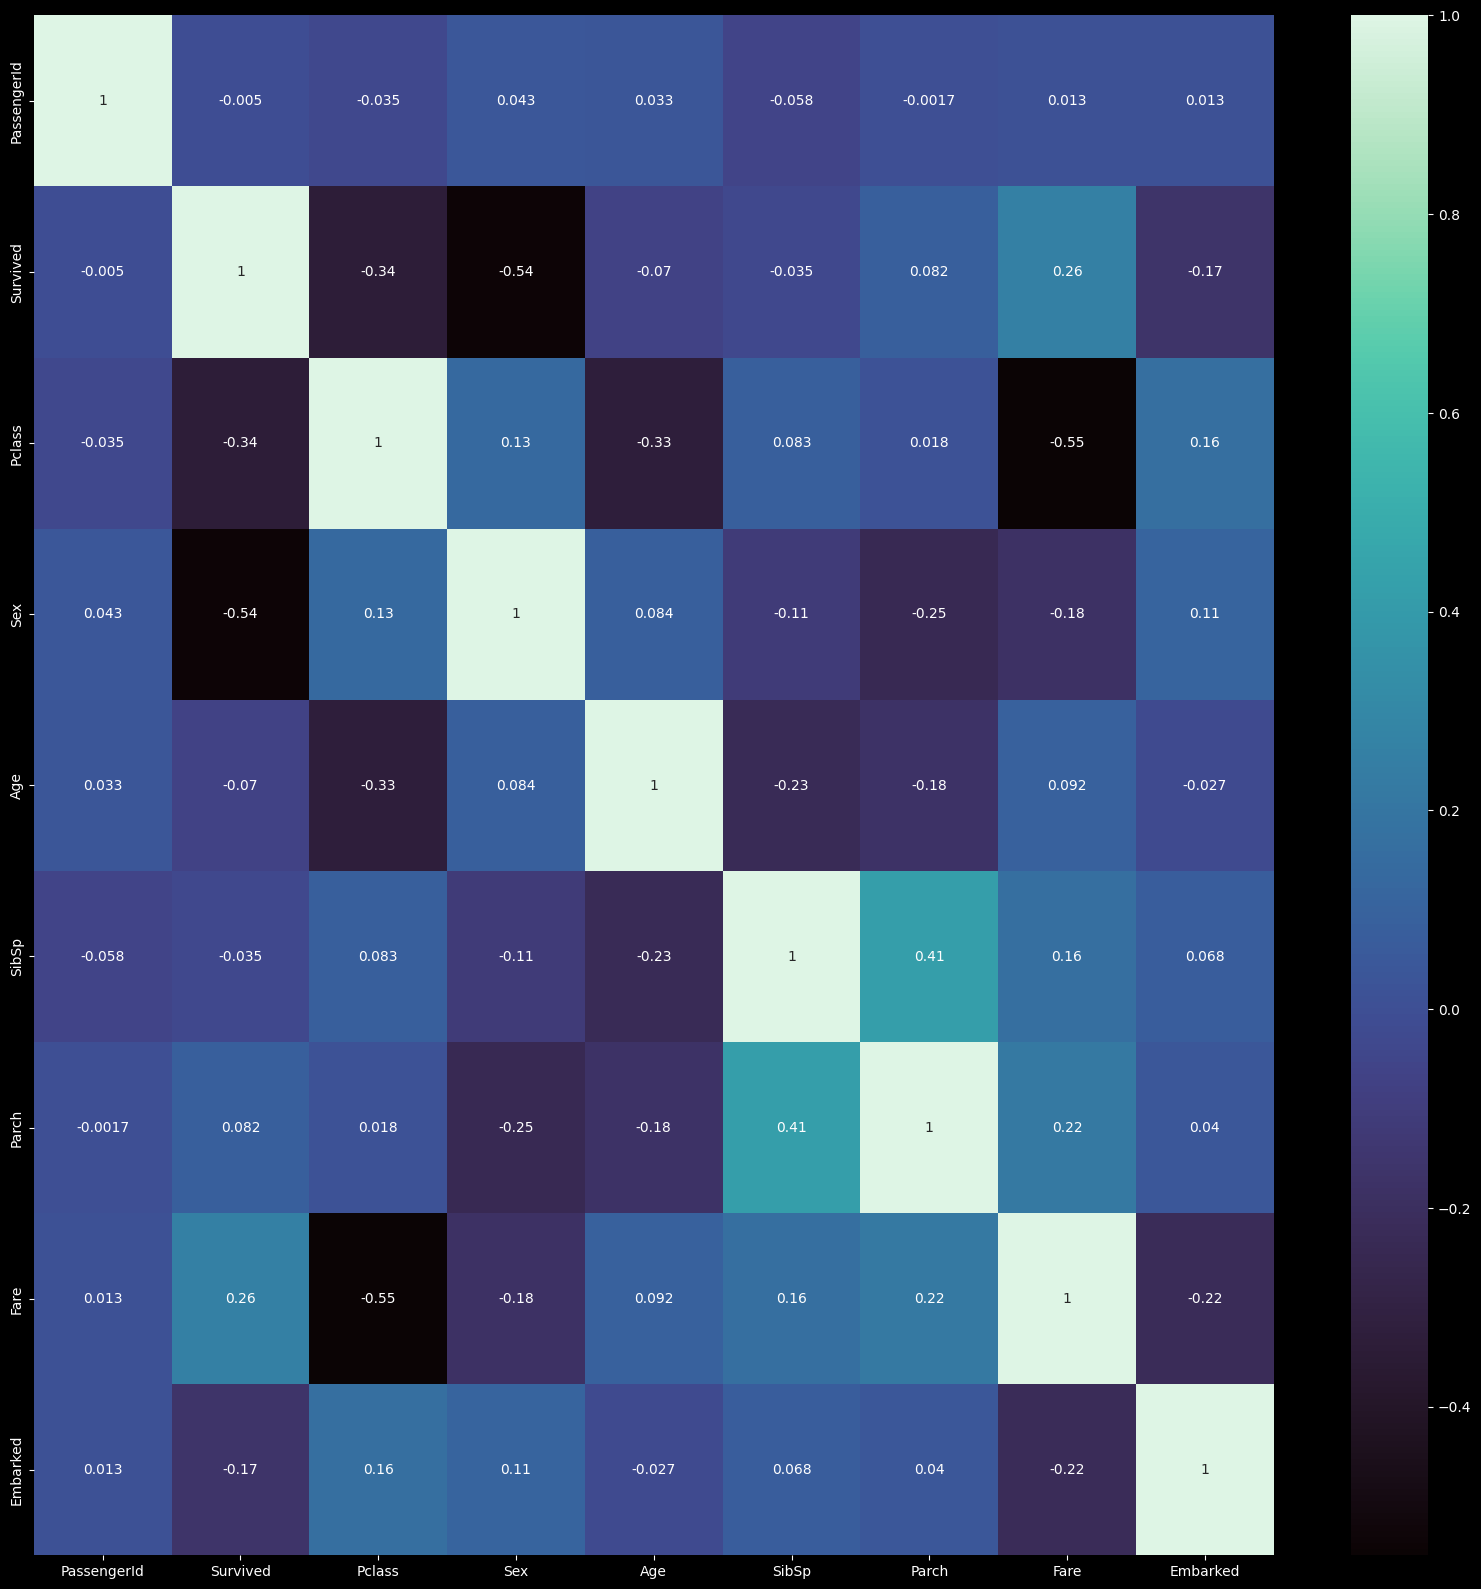

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap = "mako")

# <span style="color:skyblue">Splitting the data into training data & Test data</span>

In [16]:
X = df.drop(columns=['PassengerId','Survived'],axis=1)
Y = df["Survived"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# <span style="color:skyblue">Model Building : Logistic Regression</span>

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# <span style="color:skyblue">Model Evaluation</span>

In [19]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [20]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8019662921348315


In [21]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [22]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8100558659217877


In [23]:
print(f"Training accuracy : {model.score(X_train, Y_train)}")
print(f"Test accuracy {model.score(X_test, Y_test)}")

Training accuracy : 0.8019662921348315
Test accuracy 0.8100558659217877


# <span style="color:skyblue">Confusion Matrix</span>

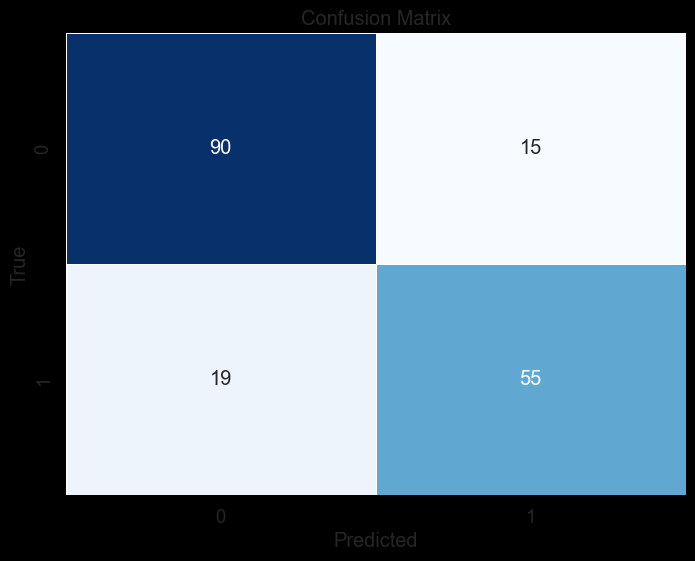

In [24]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()